# 1. Introduction to Linear Regression

## Import esstential library

In [31]:
import numpy as np
import matplotlib.pyplot as plt

## Declare data and draw data using Matplotlib.plt

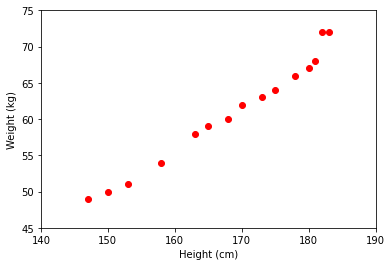

In [32]:
X = np.array([[147, 150,  153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 181, 182, 183]]).T
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 72, 72]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


In [88]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[-43.00786782]
 [  0.61762392]]


In [94]:
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

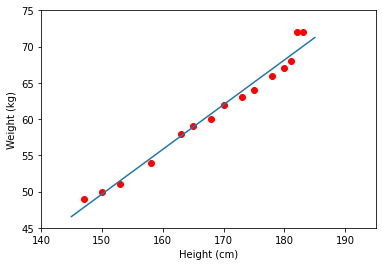

In [35]:
plt.plot(X.T, y.T, 'ro')
plt.plot(x0, y0)
plt.axis([140, 195, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

## Test with Scikit-learn

In [36]:
from sklearn import datasets, linear_model

In [38]:
regr = linear_model.LinearRegression(fit_intercept=False) # to calculating the bias
regr.fit(Xbar, y)
print('Solution found by Scikit-learn: ', regr.coef_)
print('Solution found in top: ', w.T)

Solution found by Scikit-learn:  [[-43.00786782   0.61762392]]
Solution found in top:  [[-43.00786782   0.61762392]]


# 2. Quadratic regression

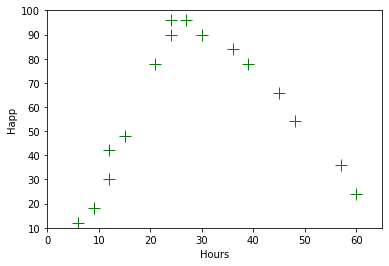

In [107]:
hours = np.array([[6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]]).T
happ = np.array([[12, 18, 30, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]]).T
plt.plot(hours, happ, 'g+', markersize=12)
plt.xlabel('Hours')
plt.ylabel('Happ')
plt.axis([0, 65, 10, 100])
plt.show()

In [79]:
# Quadratic function
# input: k: degree
# output: X: array
# Ex: k = 3, N = 3 => X = [3, 9, 27]
def Quad(k, N):
    exp_arr = np.arange(1, k + 1)
    pow_arr = np.power(N, exp_arr)
    return pow_arr
print(Quad(3, 2))

[2 4 8]


In [91]:
one_ = np.ones((hours.shape[0], 1))
X_T = np.array([Quad(2, x) for x in hours])
X_bar = np.concatenate((one_, X_T), axis=1)
X_bar
A_ = np.dot(X_bar.T, X_bar)
b_ = np.dot(X_bar.T, happ)
w_ = np.dot(np.linalg.pinv(A_), b_)
print('w_ = ', w_)

w_ =  [[-30.25286764]
 [  7.17306139]
 [ -0.10698872]]


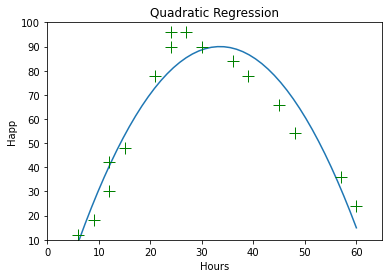

In [108]:
w_0_ = w_[0][0]
w_1_ = w_[1][0]
w_2_ = w_[2][0]
x0_ = np.linspace(0,60, 50)
y0_ = w_0_ + w_1_*x0_ + w_2_*(x0_**2)
plt.plot(x0_,y0_)
plt.axis([0, 65, 10, 100])
plt.plot(hours, happ, 'g+', markersize=12)
plt.title('Quadratic Regression')
plt.xlabel('Hours')
plt.ylabel('Happ')
plt.show()